In [ ]:
import glob
import os
import pandas as pd
from moviepy.editor import VideoFileClip
import re


Bad key "text.kerning_factor" on line 4 in
C:\Users\samae\anaconda3\envs\stream_board\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [ ]:
base_path = r"C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy"

In [ ]:
import glob
import os
import pandas as pd
from moviepy.editor import VideoFileClip
import re
import subprocess

# Define the path to your video directories
base_path = r"C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy"
# List all .mp4 files in the directory and its subdirectories
video_files = glob.glob(os.path.join(base_path, '**', '*.mp4'), recursive=True)

# Initialize an empty list to store video information
video_info = []

# Regular expression to extract the date and time from the filename
filename_regex = re.compile(r'(\d{8}_\d{9})')

def fix_video(file_path):
    temp_file = file_path + '_temp.mp4'
    command = f'ffmpeg -i "{file_path}" -c copy -movflags faststart "{temp_file}" -y'
    subprocess.call(command, shell=True)
    if os.path.exists(temp_file):
        os.remove(file_path)
        os.rename(temp_file, file_path)
    return file_path

# For each video file
for video_file in video_files:
    try:
        # Create a VideoFileClip object
        clip = VideoFileClip(video_file)

        # Extract the exact time of the video recording from the filename
        match = filename_regex.search(os.path.basename(video_file))
        if match:
            recording_time = match.group(1)
        else:
            recording_time = "Unknown"

        # Get video information
        duration = clip.duration  # duration in seconds
        frame_rate = clip.fps  # frames per second
        frame_size = clip.size  # size in pixels (width, height)
        file_size = os.path.getsize(video_file)  # file size in bytes

        # Add video information to the list
        video_info.append([video_file, recording_time, duration, frame_rate, frame_size[0], frame_size[1], file_size, None])
    except Exception as e:
        if "moov atom not found" in str(e):
            # Attempt to fix the video file
            try:
                video_file = fix_video(video_file)
                clip = VideoFileClip(video_file)

                # Extract the exact time of the video recording from the filename
                match = filename_regex.search(os.path.basename(video_file))
                if match:
                    recording_time = match.group(1)
                else:
                    recording_time = "Unknown"

                # Get video information
                duration = clip.duration  # duration in seconds
                frame_rate = clip.fps  # frames per second
                frame_size = clip.size  # size in pixels (width, height)
                file_size = os.path.getsize(video_file)  # file size in bytes

                # Add video information to the list
                video_info.append([video_file, recording_time, duration, frame_rate, frame_size[0], frame_size[1], file_size, None])
            except Exception as e_fix:
                print(f"Error processing file {video_file}: {e_fix}")
                video_info.append([video_file, "Unknown", None, None, None, None, None, "Corrupto"])
        else:
            print(f"Error processing file {video_file}: {e}")
            video_info.append([video_file, "Unknown", None, None, None, None, None, str(e)])

# Create a DataFrame from the video information
df = pd.DataFrame(video_info, columns=['File', 'Recording Time', 'Duration (s)', 'Frame Rate (fps)', 'Width (px)', 'Height (px)', 'File Size (bytes)', 'Error'])

# Save the DataFrame to a CSV file
df.to_csv('video_info_final.csv', index=False)

# Display the DataFrame
df.head()


Error processing file C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy\mayo24\Frontal\Basler_a2A1920-160ucBAS__40298464__20240524_193404491.mp4: MoviePy error: failed to read the duration of file C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy\mayo24\Frontal\Basler_a2A1920-160ucBAS__40298464__20240524_193404491.mp4.
Here are the file infos returned by ffmpeg:

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9.2.1 (GCC) 20200122
  configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --e

Error processing file C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy\mayo9\Lateral\Basler_a2A1920-160ucBAS__40298451__20240509_193118614.mp4: MoviePy error: failed to read the duration of file C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy\mayo9\Lateral\Basler_a2A1920-160ucBAS__40298451__20240509_193118614.mp4.
Here are the file infos returned by ffmpeg:

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9.2.1 (GCC) 20200122
  configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --ena

,File,Recording Time,Duration (s),Frame Rate (fps),Width (px),Height (px),File Size (bytes),Error
0,C:/Users/samae/Documents/GitHub/GUI_pattern_ge...,20240515_183354394,65.12,25.0,1920.0,1200.0,99775607.0,None
1,C:/Users/samae/Documents/GitHub/GUI_pattern_ge...,20240515_183546399,120.08,25.0,1920.0,1200.0,184000034.0,None
2,C:/Users/samae/Documents/GitHub/GUI_pattern_ge...,20240515_183855914,167.16,25.0,1920.0,1200.0,255999203.0,None
3,C:/Users/samae/Documents/GitHub/GUI_pattern_ge...,20240515_184436666,116.04,25.0,1920.0,1200.0,177683729.0,None
4,C:/Users/samae/Documents/GitHub/GUI_pattern_ge...,20240515_184758634,127.36,25.0,1920.0,1200.0,194990764.0,None


In [ ]:
import glob
import os
import pandas as pd
from moviepy.editor import VideoFileClip
import re
import subprocess
from datetime import datetime

# Define the path to your video directories
base_path = r"C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy"
# List all .mp4 files in the directory and its subdirectories
video_files = glob.glob(os.path.join(base_path, '**', '*.mp4'), recursive=True)

# Initialize an empty list to store video information
video_info = []

# Regular expression to extract the date and time from the filename
filename_regex = re.compile(r'(\d{8}_\d{9})')

def fix_video(file_path):
    temp_file = file_path + '_temp.mp4'
    command = f'ffmpeg -i "{file_path}" -c copy -movflags faststart "{temp_file}" -y'
    subprocess.call(command, shell=True)
    if os.path.exists(temp_file):
        os.remove(file_path)
        os.rename(temp_file, file_path)
    return file_path

# For each video file
for video_file in video_files:
    try:
        # Create a VideoFileClip object
        clip = VideoFileClip(video_file)

        # Get frame count
        frame_count = clip.reader.nframes

        # Extract the exact time of the video recording from the filename
        match = filename_regex.search(os.path.basename(video_file))
        if match:
            recording_time = match.group(1)
            # Convert the recording time to a datetime object
            recording_time_dt = datetime.strptime(recording_time, '%Y%m%d_%H%M%S%f')
        else:
            recording_time = "Unknown"
            recording_time_dt = None

        # Get video information
        duration = clip.duration  # duration in seconds
        frame_rate = clip.fps  # frames per second
        frame_size = clip.size  # size in pixels (width, height)
        file_size = os.path.getsize(video_file)  # file size in bytes

        # Calculate the end time of the video
        if recording_time_dt:
            end_time_dt = recording_time_dt + pd.Timedelta(seconds=duration)
        else:
            end_time_dt = None

        # Determine the camera angle from the file path
        if 'Frontal' in video_file:
            camera_angle = 'Frontal'
        elif 'Lateral' in video_file:
            camera_angle = 'Lateral'
        else:
            camera_angle = 'Unknown'

        # Calculate fps * frame count
        calculated_duration = frame_rate * frame_count

        # Add video information to the list
        video_info.append([
            video_file, recording_time, duration, frame_rate,
            frame_size[0], frame_size[1], file_size,
            camera_angle, recording_time_dt, end_time_dt, frame_count, calculated_duration, None
        ])
    except Exception as e:
        if "moov atom not found" in str(e):
            # Attempt to fix the video file
            try:
                video_file = fix_video(video_file)
                clip = VideoFileClip(video_file)

                # Get frame count
                frame_count = clip.reader.nframes

                # Extract the exact time of the video recording from the filename
                match = filename_regex.search(os.path.basename(video_file))
                if match:
                    recording_time = match.group(1)
                    # Convert the recording time to a datetime object
                    recording_time_dt = datetime.strptime(recording_time, '%Y%m%d_%H%M%S%f')
                else:
                    recording_time = "Unknown"
                    recording_time_dt = None

                # Get video information
                duration = clip.duration  # duration in seconds
                frame_rate = clip.fps  # frames per second
                frame_size = clip.size  # size in pixels (width, height)
                file_size = os.path.getsize(video_file)  # file size in bytes

                # Calculate the end time of the video
                if recording_time_dt:
                    end_time_dt = recording_time_dt + pd.Timedelta(seconds=duration)
                else:
                    end_time_dt = None

                # Determine the camera angle from the file path
                if 'Frontal' in video_file:
                    camera_angle = 'Frontal'
                elif 'Lateral' in video_file:
                    camera_angle = 'Lateral'
                else:
                    camera_angle = 'Unknown'

                # Calculate fps * frame count
                calculated_duration = frame_rate * frame_count

                # Add video information to the list
                video_info.append([
                    video_file, recording_time, duration, frame_rate,
                    frame_size[0], frame_size[1], file_size,
                    camera_angle, recording_time_dt, end_time_dt, frame_count, calculated_duration, None
                ])
            except Exception as e_fix:
                print(f"Error processing file {video_file}: {e_fix}")
                video_info.append([video_file, "Unknown", None, None, None, None, None, None, None, None, None, None, "Corrupto"])
        else:
            print(f"Error processing file {video_file}: {e}")
            video_info.append([video_file, "Unknown", None, None, None, None, None, None, None, None, None, None, str(e)])

# Create a DataFrame from the video information
df = pd.DataFrame(video_info, columns=[
    'File', 'Recording Time', 'Duration (s)', 'Frame Rate (fps)', 'Width (px)',
    'Height (px)', 'File Size (bytes)', 'Camera Angle', 'Start Time', 'End Time',
    'Frame Count', 'Calculated Duration (fps * frame count)', 'Error'
])

# Save the DataFrame to a CSV file
df.to_csv('video_info_final3.csv', index=False)

# Display the DataFrame
df.head()



Bad key "text.kerning_factor" on line 4 in
C:\Users\samae\anaconda3\envs\stream_board\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Error processing file C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy\mayo24\Frontal\Basler_a2A1920-160ucBAS__40298464__20240524_193404491.mp4: MoviePy error: failed to read the duration of file C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy\mayo24\Frontal\Basler_a2A1920-160ucBAS__40298464__20240524_193404491.mp4.
Here are the file infos returned by ffmpeg:

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9.2.1 (GCC) 20200122
  configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --e

Error processing file C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy\mayo9\Lateral\Basler_a2A1920-160ucBAS__40298451__20240509_193118614.mp4: MoviePy error: failed to read the duration of file C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy\mayo9\Lateral\Basler_a2A1920-160ucBAS__40298451__20240509_193118614.mp4.
Here are the file infos returned by ffmpeg:

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9.2.1 (GCC) 20200122
  configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --ena

,File,Recording Time,Duration (s),Frame Rate (fps),Width (px),Height (px),File Size (bytes),Camera Angle,Start Time,End Time,Frame Count,Calculated Duration (fps * frame count),Error
0,C:/Users/samae/Documents/GitHub/GUI_pattern_ge...,20240515_183354394,65.12,25.0,1920.0,1200.0,99775607.0,Frontal,2024-05-15 18:33:54.394,2024-05-15 18:34:59.514,1629.0,40725.0,None
1,C:/Users/samae/Documents/GitHub/GUI_pattern_ge...,20240515_183546399,120.08,25.0,1920.0,1200.0,184000034.0,Frontal,2024-05-15 18:35:46.399,2024-05-15 18:37:46.479,3003.0,75075.0,None
2,C:/Users/samae/Documents/GitHub/GUI_pattern_ge...,20240515_183855914,167.16,25.0,1920.0,1200.0,255999203.0,Frontal,2024-05-15 18:38:55.914,2024-05-15 18:41:43.074,4180.0,104500.0,None
3,C:/Users/samae/Documents/GitHub/GUI_pattern_ge...,20240515_184436666,116.04,25.0,1920.0,1200.0,177683729.0,Frontal,2024-05-15 18:44:36.666,2024-05-15 18:46:32.706,2902.0,72550.0,None
4,C:/Users/samae/Documents/GitHub/GUI_pattern_ge...,20240515_184758634,127.36,25.0,1920.0,1200.0,194990764.0,Frontal,2024-05-15 18:47:58.634,2024-05-15 18:50:05.994,3185.0,79625.0,None


In [ ]:
import glob
import os
import pandas as pd
from moviepy.editor import VideoFileClip
import re
import subprocess
from datetime import datetime, timedelta

# Define the path to your video directories
base_path = r"C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy"
# List all .mp4 files in the directory and its subdirectories
video_files = glob.glob(os.path.join(base_path, '**', '*.mp4'), recursive=True)

# Initialize an empty list to store video information
video_info = []

# Regular expression to extract the date and time from the filename
filename_regex = re.compile(r'(\d{8}_\d{9})')

def fix_video(file_path):
    temp_file = file_path + '_temp.mp4'
    command = f'ffmpeg -i "{file_path}" -c copy -movflags faststart "{temp_file}" -y'
    subprocess.call(command, shell=True)
    if os.path.exists(temp_file):
        os.remove(file_path)
        os.rename(temp_file, file_path)
    return file_path

# Function to extract start and end times and add them to video_info
def extract_time_info(video_file, frame_count, frame_rate, duration):
    # Extract the exact time of the video recording from the filename
    match = filename_regex.search(os.path.basename(video_file))
    if match:
        recording_time = match.group(1)
        # Convert the recording time to a datetime object
        recording_time_dt = datetime.strptime(recording_time, '%Y%m%d_%H%M%S%f')
    else:
        recording_time = "Unknown"
        recording_time_dt = None

    # Calculate the end time of the video
    if recording_time_dt:
        end_time_dt = recording_time_dt + timedelta(seconds=duration)
    else:
        end_time_dt = None

    # Determine the camera angle from the file path
    if 'Frontal' in video_file:
        camera_angle = 'Frontal'
    elif 'Lateral' in video_file:
        camera_angle = 'Lateral'
    else:
        camera_angle = 'Unknown'

    # Calculate fps * frame count and convert to seconds
    calculated_duration = frame_count / frame_rate

    # Compare calculated duration with actual duration
    duration_discrepancy = abs(calculated_duration - duration) > 1  # significant discrepancy if greater than 1 second

    # Add video information to the list
    return [
        video_file, recording_time, duration, frame_rate,
        frame_size[0], frame_size[1], file_size,
        camera_angle, recording_time_dt, end_time_dt,
        frame_count, calculated_duration, duration_discrepancy, None
    ]

# For each video file
for video_file in video_files:
    try:
        # Create a VideoFileClip object
        clip = VideoFileClip(video_file)

        # Get frame count
        frame_count = clip.reader.nframes

        # Get video information
        duration = clip.duration  # duration in seconds
        frame_rate = clip.fps  # frames per second
        frame_size = clip.size  # size in pixels (width, height)
        file_size = os.path.getsize(video_file)  # file size in bytes

        video_info.append(extract_time_info(video_file, frame_count, frame_rate, duration))
    except Exception as e:
        if "moov atom not found" in str(e):
            # Attempt to fix the video file
            try:
                video_file = fix_video(video_file)
                clip = VideoFileClip(video_file)

                # Get frame count
                frame_count = clip.reader.nframes

                # Get video information
                duration = clip.duration  # duration in seconds
                frame_rate = clip.fps  # frames per second
                frame_size = clip.size  # size in pixels (width, height)
                file_size = os.path.getsize(video_file)  # file size in bytes

                video_info.append(extract_time_info(video_file, frame_count, frame_rate, duration))
            except Exception as e_fix:
                print(f"Error processing file {video_file}: {e_fix}")
                video_info.append([video_file, "Unknown", None, None, None, None, None, None, None, None, None, None, None, "Corrupto"])
        else:
            print(f"Error processing file {video_file}: {e}")
            video_info.append([video_file, "Unknown", None, None, None, None, None, None, None, None, None, None, None, str(e)])

# Create a DataFrame from the video information
df = pd.DataFrame(video_info, columns=[
    'File', 'Recording Time', 'Duration (s)', 'Frame Rate (fps)', 'Width (px)',
    'Height (px)', 'File Size (bytes)', 'Camera Angle', 'Start Time', 'End Time',
    'Frame Count', 'Calculated Duration (s)', 'Duration Discrepancy', 'Error'
])

# Save the DataFrame to a CSV file
df.to_csv('video_info_final3.csv', index=False)

# Display the DataFrame
df.head()


Error processing file C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy\mayo24\Frontal\Basler_a2A1920-160ucBAS__40298464__20240524_193404491.mp4: MoviePy error: failed to read the duration of file C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy\mayo24\Frontal\Basler_a2A1920-160ucBAS__40298464__20240524_193404491.mp4.
Here are the file infos returned by ffmpeg:

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9.2.1 (GCC) 20200122
  configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --e

Error processing file C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy\mayo9\Frontal\90_degrees_clockwise_videos\Basler_a2A1920-160ucBAS__40298464__20240509_193117404.mp4: MoviePy error: failed to read the duration of file C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy\mayo9\Frontal\90_degrees_clockwise_videos\Basler_a2A1920-160ucBAS__40298464__20240509_193117404.mp4.
Here are the file infos returned by ffmpeg:

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9.2.1 (GCC) 20200122
  configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --e

,File,Recording Time,Duration (s),Frame Rate (fps),Width (px),Height (px),File Size (bytes),Camera Angle,Start Time,End Time,Frame Count,Calculated Duration (s),Duration Discrepancy,Error
0,C:/Users/samae/Documents/GitHub/GUI_pattern_ge...,20240515_183354394,65.12,25.0,1920.0,1200.0,99775607.0,Frontal,2024-05-15 18:33:54.394,2024-05-15 18:34:59.514,1629.0,65.16,False,None
1,C:/Users/samae/Documents/GitHub/GUI_pattern_ge...,20240515_183546399,120.08,25.0,1920.0,1200.0,184000034.0,Frontal,2024-05-15 18:35:46.399,2024-05-15 18:37:46.479,3003.0,120.12,False,None
2,C:/Users/samae/Documents/GitHub/GUI_pattern_ge...,20240515_183855914,167.16,25.0,1920.0,1200.0,255999203.0,Frontal,2024-05-15 18:38:55.914,2024-05-15 18:41:43.074,4180.0,167.20,False,None
3,C:/Users/samae/Documents/GitHub/GUI_pattern_ge...,20240515_184436666,116.04,25.0,1920.0,1200.0,177683729.0,Frontal,2024-05-15 18:44:36.666,2024-05-15 18:46:32.706,2902.0,116.08,False,None
4,C:/Users/samae/Documents/GitHub/GUI_pattern_ge...,20240515_184758634,127.36,25.0,1920.0,1200.0,194990764.0,Frontal,2024-05-15 18:47:58.634,2024-05-15 18:50:05.994,3185.0,127.40,False,None


In [ ]:
print(df.describe(include='all'))


                                                     File Recording Time  \
count                                                 216            216   
unique                                                216            185   
top     C:/Users/samae/Documents/GitHub/GUI_pattern_ge...        Unknown   
freq                                                    1              8   
first                                                 NaN            NaN   
last                                                  NaN            NaN   
mean                                                  NaN            NaN   
std                                                   NaN            NaN   
min                                                   NaN            NaN   
25%                                                   NaN            NaN   
50%                                                   NaN            NaN   
75%                                                   NaN            NaN   
max         

                                                     File Recording Time  \
count                                                 216            216   
unique                                                216            185   
top     C:/Users/samae/Documents/GitHub/GUI_pattern_ge...        Unknown   
freq                                                    1              8   
first                                                 NaN            NaN   
last                                                  NaN            NaN   
mean                                                  NaN            NaN   
std                                                   NaN            NaN   
min                                                   NaN            NaN   
25%                                                   NaN            NaN   
50%                                                   NaN            NaN   
75%                                                   NaN            NaN   
max         

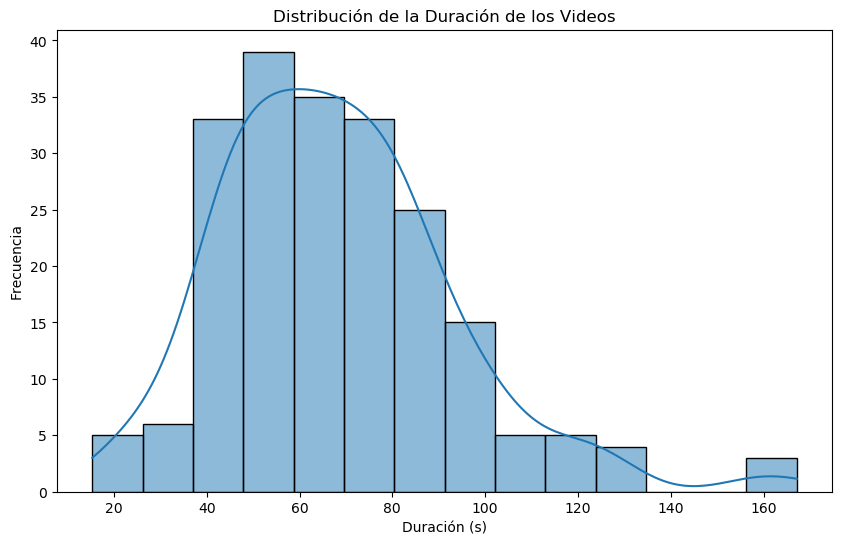

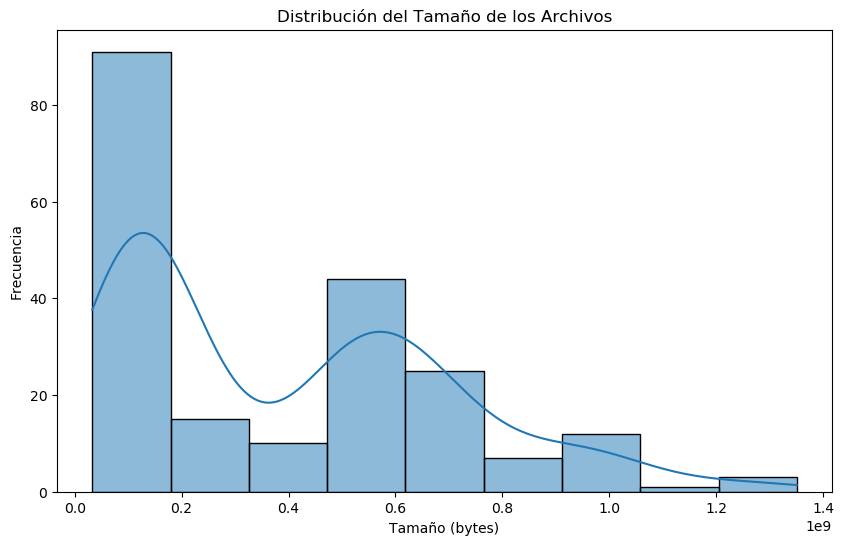

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos del archivo CSV

# Añadir una columna para el ángulo de la cámara basado en el nombre del archivo
#df['Camera Angle'] = df['File'].apply(lambda x: 'Frontal' if 'Frontal' in x else 'Lateral')

# Estadísticas descriptivas
desc_stats = df.describe(include='all')

# Guardar las estadísticas descriptivas en un archivo CSV
desc_stats.to_csv('descriptive_stats.csv')

# Mostrar las estadísticas descriptivas
print(desc_stats)

# Graficar la distribución de la duración de los videos
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration (s)'], kde=True)
plt.title('Distribución de la Duración de los Videos')
plt.xlabel('Duración (s)')
plt.ylabel('Frecuencia')
plt.show()

# Graficar la distribución del tamaño de los archivos
plt.figure(figsize=(10, 6))
sns.histplot(df['File Size (bytes)'], kde=True)
plt.title('Distribución del Tamaño de los Archivos')
plt.xlabel('Tamaño (bytes)')
plt.ylabel('Frecuencia')
plt.show()

import ace_tools as tools; tools.display_dataframe_to_user(name="Descriptive Statistics", dataframe=desc_stats)


In [ ]:
import os
import cv2


In [ ]:
os.chdir("C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy/mayo9/Lateral")

In [ ]:
os.listdir()

['Basler_a2A1920-160ucBAS__40298451__20240509_190231533.mp4',
 'Basler_a2A1920-160ucBAS__40298451__20240509_191526862.mp4',
 'Basler_a2A1920-160ucBAS__40298451__20240509_191905880.mp4',
 'Basler_a2A1920-160ucBAS__40298451__20240509_192245413.mp4',
 'Basler_a2A1920-160ucBAS__40298451__20240509_192458831.mp4',
 'Basler_a2A1920-160ucBAS__40298451__20240509_192829762.mp4',
 'Basler_a2A1920-160ucBAS__40298451__20240509_193118614.mp4',
 'Basler_a2A1920-160ucBAS__40298451__20240509_193236972.mp4',
 'extracted_videos']

In [ ]:

# Create a new folder called '90_degrees_clockwise_videos' if it doesn't exist
if not os.path.exists('90_degrees_clockwise_videos'):
    os.mkdir('90_degrees_clockwise_videos')

for filename in os.listdir():
    if filename.endswith(".mp4"):  # Ensure you're processing video files only
        # Open the video file
        video_path = os.path.join(os.getcwd(), filename)
        print(video_path)
        cap = cv2.VideoCapture(video_path)

        # Get the video width and height
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        # Create a new video file to store the rotated video
        output_path = os.path.join(os.getcwd(), '90_degrees_clockwise_videos', filename)
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, cap.get(cv2.CAP_PROP_FPS), (height, width))

        # Read each frame from the video and rotate it 90 degrees clockwise
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
            out.write(frame)

        # Release the video capture and writer objects after the loop
        cap.release()
        out.release()


C:\Users\samae\Documents\GitHub\GUI_pattern_generator\data\datos_tesis\videosXavy\mayo28\Frontal\Basler_a2A1920-160ucBAS__40298464__20240528_191210709.mp4
C:\Users\samae\Documents\GitHub\GUI_pattern_generator\data\datos_tesis\videosXavy\mayo28\Frontal\Basler_a2A1920-160ucBAS__40298464__20240528_191544258.mp4
C:\Users\samae\Documents\GitHub\GUI_pattern_generator\data\datos_tesis\videosXavy\mayo28\Frontal\Basler_a2A1920-160ucBAS__40298464__20240528_191758644.mp4
C:\Users\samae\Documents\GitHub\GUI_pattern_generator\data\datos_tesis\videosXavy\mayo28\Frontal\Basler_a2A1920-160ucBAS__40298464__20240528_192035448.mp4
C:\Users\samae\Documents\GitHub\GUI_pattern_generator\data\datos_tesis\videosXavy\mayo28\Frontal\Basler_a2A1920-160ucBAS__40298464__20240528_192317840.mp4
C:\Users\samae\Documents\GitHub\GUI_pattern_generator\data\datos_tesis\videosXavy\mayo28\Frontal\Basler_a2A1920-160ucBAS__40298464__20240528_192531324.mp4
C:\Users\samae\Documents\GitHub\GUI_pattern_generator\data\datos_tesis

### Segmentar los videos

In [ ]:
import os
import cv2
from datetime import timedelta
import csv
import re
from moviepy.editor import VideoFileClip

def extract_time_from_filename(filename):
    match = re.search(r'_(\d{9})\.', filename)
    if match:
        time_str = match.group(1)
        hours = int(time_str[0:2])
        minutes = int(time_str[2:4])
        seconds = int(time_str[4:6])
        milliseconds = int(time_str[6:9])
        return hours, minutes, seconds, milliseconds
    return None

def calculate_time_difference(frontal_time, lateral_time):
    frontal_total_ms = (frontal_time[0] * 3600 + frontal_time[1] * 60 + frontal_time[2]) * 1000 + frontal_time[3]
    lateral_total_ms = (lateral_time[0] * 3600 + lateral_time[1] * 60 + lateral_time[2]) * 1000 + lateral_time[3]
    return frontal_total_ms - lateral_total_ms

def equivalent_frames(start_frame, fps_src, fps_dst, time_diff_ms, previous_time_diff_sec=0):
    time_diff_sec = time_diff_ms / 1000
    start_time_sec = start_frame / fps_src
    equivalent_start_time_sec = start_time_sec + time_diff_sec + previous_time_diff_sec
    equivalent_frame = equivalent_start_time_sec * fps_dst
    incremental_time_diff = (start_time_sec + time_diff_sec) - equivalent_start_time_sec
    return int(equivalent_frame), incremental_time_diff

def extract_segment(video_path, start_frame, end_frame):
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    frames_extracted = []
    for frame_number in range(start_frame, end_frame):
        ret, frame = cap.read()
        if ret:
            frames_extracted.append(frame)
        else:
            print(f"Failed to read frame {frame_number} from {video_path}")
            break
    cap.release()
    return frames_extracted

def save_frames(frames, output_path, fps):
    if not frames:
        print(f"No frames to save for {output_path}")
        return
    height, width, layers = frames[0].shape
    size = (width, height)
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, size)
    print(f"Saving video to {output_path} with FPS: {fps} and size: {size}")
    for frame in frames:
        out.write(frame)
    out.release()

def save_to_csv(data, csv_path):
    output_dir = os.path.dirname(csv_path)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    with open(csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Filename", "Start Frame", "End Frame", "FPS", "Start Time", "Equivalent Time (s)", "Time Difference (ms)", "Previous Time Diff (s)", "Incremental Time Diff (s)"])
        for row in data:
            writer.writerow(row)
    print(f"Data has been saved to {csv_path}")

def synchronize_videos(frontal_video_path, lateral_video_path, lateral_start_frame, previous_time_diff_sec=0, frontal_start_frame=None):
    frontal_time = extract_time_from_filename(os.path.basename(frontal_video_path))
    lateral_time = extract_time_from_filename(os.path.basename(lateral_video_path))
    if not frontal_time or not lateral_time:
        print("Error extracting time from filenames")
        return None, None, None

    time_difference_ms = calculate_time_difference(frontal_time, lateral_time)
    frontal_clip = VideoFileClip(frontal_video_path)
    lateral_clip = VideoFileClip(lateral_video_path)
    frontal_fps = frontal_clip.fps
    lateral_fps = lateral_clip.fps
    print(f"Time difference (ms): {time_difference_ms}")
    print(f"Frontal FPS: {frontal_fps}, Lateral FPS: {lateral_fps}")
    frontal_clip.close()
    lateral_clip.close()

    lateral_start_frame_adjusted = max(lateral_start_frame - int(1 * lateral_fps), 0)
    lateral_end_frame = lateral_start_frame + int(3 * lateral_fps)

    if frontal_start_frame is not None:
        frontal_start_frame_adjusted = max(frontal_start_frame - int(1 * frontal_fps), 0)
        equivalent_time_sec = frontal_start_frame_adjusted / frontal_fps  # Use the known start frame
        incremental_time_diff = 0  # No incremental time diff needed for known start frame
    else:
        if time_difference_ms > 0:
            frontal_start_frame, incremental_time_diff = equivalent_frames(lateral_start_frame, lateral_fps, frontal_fps, time_difference_ms, previous_time_diff_sec)
        else:
            frontal_start_frame, incremental_time_diff = equivalent_frames(lateral_start_frame, lateral_fps, frontal_fps, -time_difference_ms, previous_time_diff_sec)
        frontal_start_frame_adjusted = max(frontal_start_frame - int(1 * frontal_fps), 0)
        equivalent_time_sec = frontal_start_frame_adjusted / frontal_fps

    previous_frontal_end_frame = frontal_start_frame_adjusted + int(4 * frontal_fps)

    lateral_equivalent_time_sec = lateral_start_frame_adjusted / lateral_fps
    frontal_equivalent_time_sec = frontal_start_frame_adjusted / frontal_fps

    print(f"Lateral frames to extract: from {lateral_start_frame_adjusted} to {lateral_end_frame} (equivalent time: {lateral_equivalent_time_sec} s)")
    print(f"Frontal frames to extract: from {frontal_start_frame_adjusted} to {previous_frontal_end_frame} (equivalent time: {frontal_equivalent_time_sec} s)")

    return (lateral_start_frame_adjusted, lateral_end_frame, lateral_fps, lateral_equivalent_time_sec), (frontal_start_frame_adjusted, previous_frontal_end_frame, frontal_fps, frontal_equivalent_time_sec, incremental_time_diff), time_difference_ms

def process_videos(frontal_video_path, lateral_video_path, frontal_start_frames, lateral_start_frames, csv_path):
    data = []
    previous_time_diff_sec = 0
    previous_frontal_end_frame = 0

    for i, lateral_start_frame in enumerate(lateral_start_frames):
        if i < len(frontal_start_frames):
            frontal_start_frame = frontal_start_frames[i]
        else:
            frontal_start_frame = None

        (lateral_start_frame_adjusted, lateral_end_frame, lateral_fps, lateral_equivalent_time_sec), (frontal_start_frame_adjusted, previous_frontal_end_frame, frontal_fps, frontal_equivalent_time_sec, incremental_time_diff), time_difference_ms = synchronize_videos(frontal_video_path, lateral_video_path, lateral_start_frame, previous_time_diff_sec, frontal_start_frame)

        # Ensure the frames are in a logical sequential order
        if i > 0 and frontal_start_frame_adjusted <= previous_frontal_end_frame:
            frontal_start_frame_adjusted = previous_frontal_end_frame + 1
            frontal_equivalent_time_sec = frontal_start_frame_adjusted / frontal_fps

        lateral_frames_extracted = extract_segment(lateral_video_path, lateral_start_frame_adjusted, lateral_end_frame)
        frontal_frames_extracted = extract_segment(frontal_video_path, frontal_start_frame_adjusted, previous_frontal_end_frame)

        output_dir = os.path.join(os.path.dirname(lateral_video_path), 'extracted_videos')
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        time_suffix = (timedelta(seconds=lateral_equivalent_time_sec) + timedelta(seconds=lateral_start_frame / lateral_fps))
        time_suffix_formatted = f"{time_suffix.seconds//3600:02}{(time_suffix.seconds//60)%60:02}{time_suffix.seconds%60:02}{time_suffix.microseconds//1000:03}"

        lateral_output_path = os.path.join(output_dir, os.path.splitext(os.path.basename(lateral_video_path))[0] + f"_{time_suffix_formatted}.mp4")
        frontal_output_path = os.path.join(output_dir, os.path.splitext(os.path.basename(frontal_video_path))[0] + f"_{time_suffix_formatted}.mp4")

        save_frames(lateral_frames_extracted, lateral_output_path, lateral_fps)
        save_frames(frontal_frames_extracted, frontal_output_path, frontal_fps)

        data.append([lateral_output_path, lateral_start_frame_adjusted, lateral_end_frame, lateral_fps, lateral_equivalent_time_sec, time_difference_ms, previous_time_diff_sec, incremental_time_diff])
        data.append([frontal_output_path, frontal_start_frame_adjusted, previous_frontal_end_frame, frontal_fps, frontal_equivalent_time_sec, time_difference_ms, previous_time_diff_sec, incremental_time_diff])

        if i < len(frontal_start_frames):
            time_diff_with_previous = (timedelta(seconds=lateral_equivalent_time_sec) - timedelta(seconds=frontal_equivalent_time_sec)).total_seconds()
            previous_time_diff_sec += time_diff_with_previous

    save_to_csv(data, csv_path)
    print(f"Frames have been extracted and saved successfully.")

# Example usage:
frontal_video_path = 'C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy/mayo15/Frontal/Basler_a2A1920-160ucBAS__40298464__20240515_183354394.mp4'
lateral_video_path = 'C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy/mayo15/Lateral/Basler_a2A1920-160ucBAS__40298451__20240515_183352214.mp4'

frontal_start_frames = [275, 598]  # Example frame numbers
lateral_start_frames = [1319, 2610, 4217, 5507]  # Example frame numbers
csv_path = 'C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy/mayo15/Lateral/extracted_videos/video_extraction_info.csv'

process_videos(frontal_video_path, lateral_video_path, frontal_start_frames, lateral_start_frames, csv_path)

Time difference (ms): 2180
Frontal FPS: 25.0, Lateral FPS: 156.0
Lateral frames to extract: from 1163 to 1787 (equivalent time: 7.455128205128205 s)
Frontal frames to extract: from 250 to 350 (equivalent time: 10.0 s)
Saving video to C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy/mayo15/Lateral\extracted_videos\Basler_a2A1920-160ucBAS__40298451__20240515_183352214_000015910.mp4 with FPS: 156.0 and size: (1200, 1920)
Saving video to C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy/mayo15/Lateral\extracted_videos\Basler_a2A1920-160ucBAS__40298464__20240515_183354394_000015910.mp4 with FPS: 25.0 and size: (1920, 1200)
Time difference (ms): 2180
Frontal FPS: 25.0, Lateral FPS: 156.0
Lateral frames to extract: from 2454 to 3078 (equivalent time: 15.73076923076923 s)
Frontal frames to extract: from 573 to 673 (equivalent time: 22.92 s)
Saving video to C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/vid

I want a code function that reads the duration, fps and time from these videos, the time should be extracted from the title in the last part of the name, like 183354394 would be 18:33 with 54 second sand 394 miliseconds. I want the function to calculate the time difference that the videos were recorded (2180 ms difference in this case where the lateral video started first) and extract the equivalent in frames as 1 second before and 3 seconds after for the lateral_start_frames and then calculate its equivalent frame in the Frontal video (which is at a different frame rate), so for example, if the lateral start frame is 624 at 156 fps (which is equivalent to the 4th sec of the video), its equivalent frame in the frontal video would  be 154,5, because it started 2.180 seconds after it.

frontal_video_path = 'C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy/mayo15/Frontal/Basler_a2A1920-160ucBAS__40298464__20240515_183354394.mp4'
lateral_video_path = 'C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy/mayo15/Lateral/Basler_a2A1920-160ucBAS__40298451__20240515_183352214.mp4'

lateral_start_frames = [1319, 2610, 4217, 5507]  # Example frame numbers

Time difference (ms): 2180
Frontal FPS: 25.0, Lateral FPS: 156.0
Equivalent frames in frontal video: [265, 472, 730, 937]


In [ ]:
import os
from moviepy.editor import VideoFileClip
import ffmpeg

# Function to get the bitrate of the video
def get_bitrate(video_path):
    try:
        print(f"Probing: {video_path}")  # Debug statement
        # Explicitly specify the path to ffmpeg if it's not in the PATH
        probe = ffmpeg.probe(video_path)
        format_info = probe['format']
        bit_rate = int(format_info['bit_rate'])
        return bit_rate
    except ffmpeg.Error as e:
        print(f"Failed to probe {video_path}: {e}")
        return None

# Set the directory
os.chdir(r"C:/Users/samae/Documents/GitHub/GUI_pattern_generator/data/datos_tesis/videosXavy/mayo9/Lateral/")

# Create a new folder called '90_degrees_clockwise_videos' if it doesn't exist
if not os.path.exists('90_degrees_clockwise_videos'):
    os.mkdir('90_degrees_clockwise_videos')

for filename in os.listdir():
    if filename.endswith(".mp4"):  # Ensure you're processing video files only
        # Open the video file
        video_path = os.path.join(os.getcwd(), filename)
        print(f"Processing: {video_path}")

        # Check if file exists
        if not os.path.isfile(video_path):
            print(f"File not found: {video_path}")
            continue

        # Get the original bitrate
        bit_rate = get_bitrate(video_path)

        if bit_rate is not None:
            # Load the video using moviepy
            try:
                clip = VideoFileClip(video_path)

                # Rotate the video 90 degrees clockwise
                rotated_clip = clip.rotate(270)  # 270 degrees is clockwise for moviepy

                # Save the rotated video
                output_path = os.path.join(os.getcwd(), '90_degrees_clockwise_videos', filename)
                rotated_clip.write_videofile(output_path, codec='libx264', fps=clip.fps, bitrate=f"{bit_rate}b")

                # Close the clip
                clip.close()
                rotated_clip.close()
            except Exception as e:
                print(f"Failed to process {video_path}: {e}")
        else:
            print(f"Skipping {video_path} due to bitrate probing failure.")


Processing: C:\Users\samae\Documents\GitHub\GUI_pattern_generator\data\datos_tesis\videosXavy\mayo9\Lateral\Basler_a2A1920-160ucBAS__40298451__20240509_190231533.mp4
Probing: C:\Users\samae\Documents\GitHub\GUI_pattern_generator\data\datos_tesis\videosXavy\mayo9\Lateral\Basler_a2A1920-160ucBAS__40298451__20240509_190231533.mp4


FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado

In [ ]:
video_path= "C:/Users/samae/Documents/GitHub/GUI_patt/ern_g/nerator/data/datos_tesis/videosXavy/mayo9/Lateral/Basler_a2A1920-160ucBAS__40298451__20240509_190231533.mp4"

probe = ffmpeg.probe(video_path)

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado